# Exploratory Data Analysis on Data Science and STEM Salaries Dataset 💸

### If this helped you or was interesting to you, your UPVOTES would be very much appreciated – they are the source of my motivation!

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r"STEM salaries.csv")
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [7]:
df.shape

(62642, 29)

# data cleaning

drop high cordanality columns.

In [8]:
# drop IDs
df.drop(columns=["rowNumber", "cityid"],inplace=True)

### 1- timestamp column

In [9]:
df['timestamp'].dtype

dtype('O')

In [10]:
df['timestamp']= pd.to_datetime(df['timestamp'])
df['Month']= df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year

In [11]:
df['year'].value_counts()

2020    23946
2021    23427
2019    11189
2018     3895
2017      185
Name: year, dtype: int64

In [12]:
df.drop(columns='timestamp', inplace= True)

### 2- race columns

In [13]:
df["Race"].unique()

array([nan, 'White', 'Asian', 'Black', 'Two Or More', 'Hispanic'],
      dtype=object)

In [14]:
df["Race"].value_counts()

Asian          11772
White           8032
Hispanic        1129
Two Or More      804
Black            690
Name: Race, dtype: int64

In [15]:
df["Race_Asian"].value_counts()

0    50870
1    11772
Name: Race_Asian, dtype: int64

In [16]:
df["Race_White"].value_counts()

0    54610
1     8032
Name: Race_White, dtype: int64

From this, we can already tell that the values are accounted for, as seen in Race_Asian and Race.Therefore, we are able to remove the columns, since there are already reflected in the Race column.

In [17]:
df.drop(columns=["Race_White","Race_Asian","Race_Two_Or_More","Race_Black","Race_Hispanic"],inplace=True)

### 3- education columns

In [18]:
print(df['Education'].unique(), end='\n \n')
print(df['Education'].value_counts())

[nan 'PhD' "Master's Degree" "Bachelor's Degree" 'Some College'
 'Highschool']
 
Master's Degree      15391
Bachelor's Degree    12601
PhD                   1703
Some College           355
Highschool             320
Name: Education, dtype: int64


In [19]:
df['Doctorate_Degree'].value_counts()

0    60839
1     1803
Name: Doctorate_Degree, dtype: int64

In [20]:
df['Bachelors_Degree'].value_counts()

0    50037
1    12605
Name: Bachelors_Degree, dtype: int64

We can see that Doctorate_Degree reflects someone having a PhD and this also applies to Bachelors_Degree column. 

Let's define a function `find_education_degree` that takes a row as input and returns the highest education degree based on certain conditions.

In [21]:
def find_education_degree(row):
    if row[17] == 1:
        return 'Doctorate_Degree'
    elif row[15] == 1:
        return 'Masters_Degree'
    elif row[16] == 1:
        return 'Bachelors_Degree'
    elif row[19] == 1:
        return 'Some_College'
    elif row[18] == 1:
        return 'Highschool'
    else:
        return 'unknown'    

education = df.apply(find_education_degree, axis='columns')
df['Education'] = education

In [22]:
# drop useless columns
df.drop(columns=['Doctorate_Degree','Masters_Degree', 'Bachelors_Degree', 'Some_College', 'Highschool' ], inplace=True)

In [23]:
df['Education'].unique()

array(['unknown', 'Bachelors_Degree', 'Masters_Degree', 'Highschool',
       'Doctorate_Degree'], dtype=object)

### 4- otherdetails column

In [24]:
df["otherdetails"].unique()

array([nan, 'Tons of overtime', 'PhD', ...,
       '40k cash split over 2 years. 75k rsus over 4 years. Bonus is median 10% of base per yr.',
       '65k of stocks at 5/15/40/40 vesting schedule per year. First job out of college, only internship experience prior',
       'industry hire'], dtype=object)

In [25]:
df["otherdetails"].value_counts().to_frame().head(10)

,otherdetails
Masters,3983
Title: Software Engineer,1453
"Race: Asian, Academic Level: Master’s degree",1213
"Race: White, Academic Level: Bachelor’s degree",1075
"Race: Asian, Academic Level: Bachelor’s degree",977
"Title: Software Engineer, Race: Asian, Academic Level: Master’s degree",726
"Title: Software Engineer, Race: Asian, Academic Level: Bachelor’s degree",662
"Title: Software Engineer, Race: White, Academic Level: Bachelor’s degree",540
"Race: White, Academic Level: Master’s degree",520
Academic Level: Master’s degree,482


In [26]:
len(df.otherdetails.drop_duplicates())

12842

The column `otherdetails` has 12K+ different values and would require NLP to be used as a feature.

Also this column collect informations from `degree`, `race`, `level` and `title`. this column shouldn't be really necessary for us.

In [27]:
df.drop(columns=["otherdetails"],inplace=True)

### 5- location column

In [28]:
df["location"].value_counts()

Seattle, WA                      8701
San Francisco, CA                6797
New York, NY                     4562
Redmond, WA                      2649
Mountain View, CA                2275
                                 ... 
San Fernando, LB, Philippines       1
Suwanee, GA                         1
Oxford, MS                          1
Wayne, PA                           1
Hilbert, WI                         1
Name: location, Length: 1050, dtype: int64

The location can be feature engineered to give both the area and the country.

In [29]:
# Splitting the data to get the information
df['area'] = df.location.apply(lambda x: x.split(',')[0])
df['area'] = df['area'].apply(lambda x: x.strip())

df['country'] = df.location.apply(lambda x: x.split(',')[-1])
df['country'] = df['country'].apply(lambda x: x.strip())

In [30]:
print(df['country'].nunique())

129


In [31]:
# We define the function united_states so that we can catch cases with Area, City. e.g. Cupertino, CA 
df['country'] = df['country'].apply(lambda x: x if len(x) != 2 else 'United States')

In [32]:
# drop location column
df.drop(columns='location' , inplace=True)

### 6-  gender column

In [33]:
df['gender'].value_counts()

Male                               35702
Female                              6999
Other                                400
Title: Senior Software Engineer        1
Name: gender, dtype: int64

In [34]:
df['gender'].isna().sum()

19540

Here is a significant number of missing values in Gender.

We can take missing values as `Unknown` since they probably did not want to divulge their gender.

There is `Title: Senior Software Engineer?` datapoint that we will have manually change to `Unknown`.

In [35]:
df['gender'] = df['gender'].replace('Title: Senior Software Engineer', 'unknown')
df['gender'] = df['gender'].fillna('unknown')

### 7- total income

In [36]:
df[['totalyearlycompensation','basesalary','bonus','stockgrantvalue']].head(10)

,totalyearlycompensation,basesalary,bonus,stockgrantvalue
0,127000,107000.0,10000.0,20000.0
1,100000,0.0,0.0,0.0
2,310000,155000.0,0.0,0.0
3,372000,157000.0,35000.0,180000.0
4,157000,0.0,0.0,0.0
5,208000,0.0,0.0,0.0
6,300000,180000.0,55000.0,65000.0
7,156000,135000.0,13000.0,8000.0
8,120000,0.0,0.0,0.0
9,201000,157000.0,28000.0,26000.0


`totalyearlycompensation` column includes more than just the money paid to an employee. Total compensation includes the base salary, but it also includes the value of any benefits received in addition to your salary.

So we will drop `basesalary` , `bonus` and `stockgrantvalue` columns.

In [37]:
df.drop(columns=['basesalary','bonus','stockgrantvalue'] , inplace=True)

In [38]:
df.shape

(62642, 15)

In [39]:
df.isna().sum()

company                        5
level                        119
title                          0
totalyearlycompensation        0
yearsofexperience              0
yearsatcompany                 0
tag                          854
gender                         0
dmaid                          2
Race                       40215
Education                      0
Month                          0
year                           0
area                           0
country                        0
dtype: int64

In [40]:
df[['company','level','Race','tag']] = df[['company','level','Race','tag']].fillna('unknown')


Now, The data has been cleaned, and therefore we are able to do some Exploratory Data Analysis and visualizations.

# data visualization

In [41]:
sns.set(style="whitegrid", color_codes=True)
sns.set_palette('crest_r', 30)

In [42]:
# Add labels to the end of each bar in a bar chart.
def add_value_labels(ax, spacing=5):

    # For each bar: Place a label    
    for rect in ax.patches:
        
        # Get X and Y placement of label from rect.
        x = rect.get_x() + rect.get_width() / 2
        y = rect.get_height()

        # Determine vertical alignment for positive and negative values
        va = 'bottom' if y >= 0 else 'top'

        # Format the label to one decimal place
        label = "{:.1f}".format(y)

        # Determine the vertical shift of the label
        # based on the sign of the y value and the spacing parameter
        y_shift = spacing * (1 if y >= 0 else -1)

        # Create the annotation
        ax.annotate(label, (x, y), xytext=(0, y_shift),
                    textcoords="offset points", ha='center', va=va)

# Companies with most employees

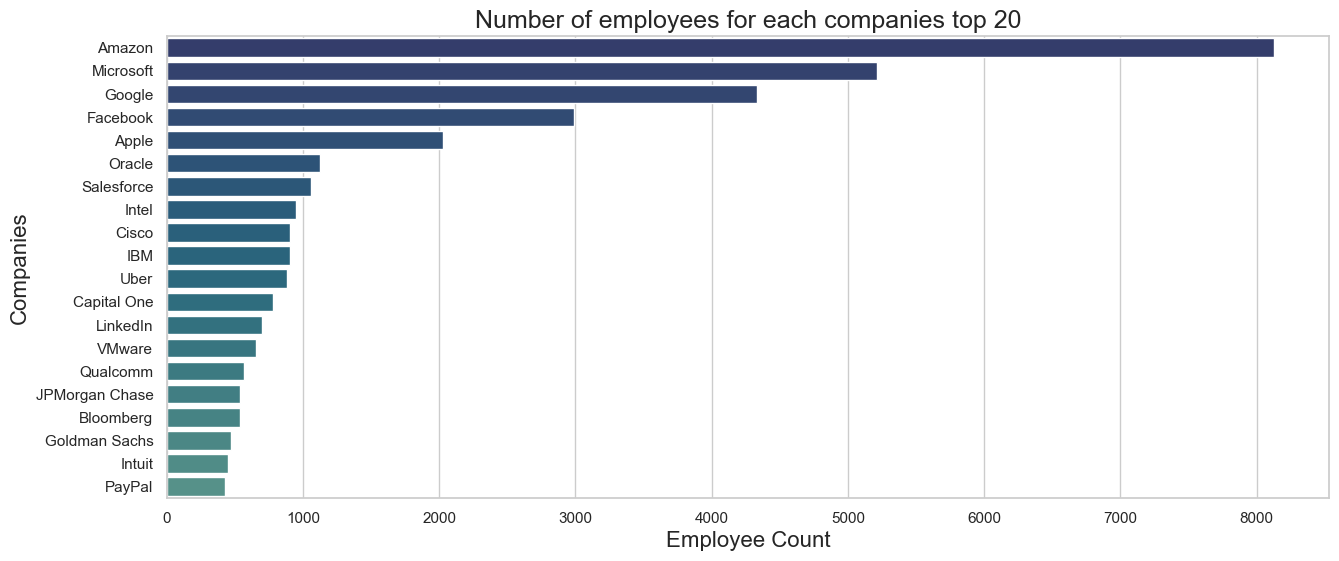

In [55]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['company'].value_counts().values[:20], y=df['company'].value_counts().keys()[:20])
plt.title('Number of employees for each companies top 20', fontsize=18)
plt.xlabel('Employee Count', fontsize=16)
plt.ylabel('Companies', fontsize=16);

**Amazon was the number 1 employer of tech workers, followed by Microsoft and Google**

# Gender information

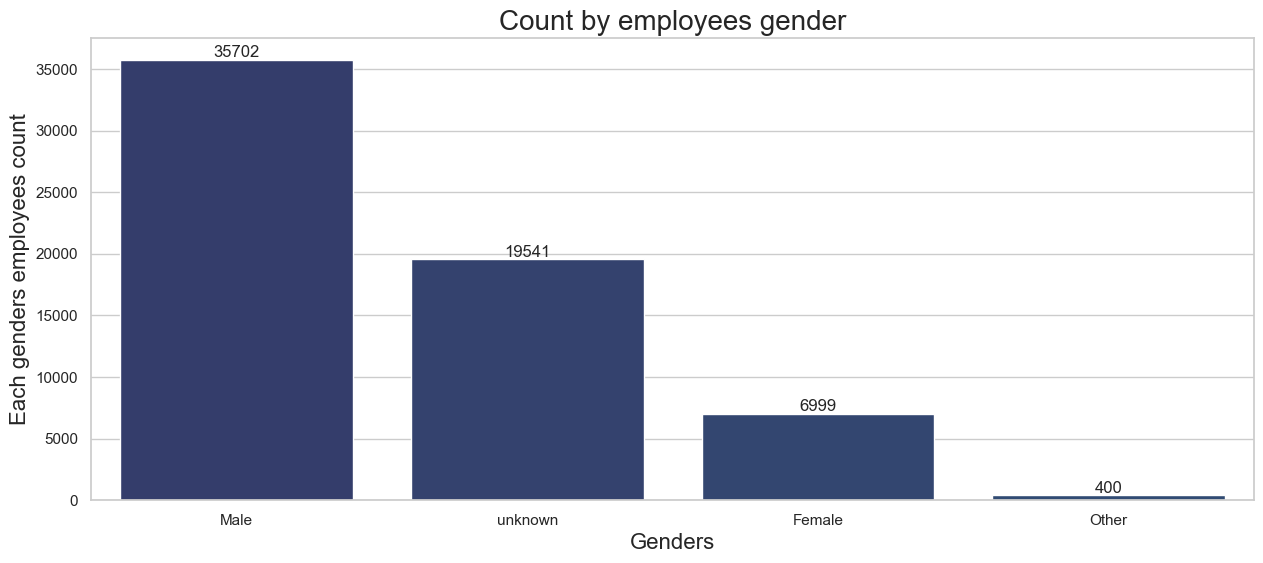

In [60]:
plt.figure(figsize=(15,6))
splot = sns.barplot(x=df['gender'].value_counts().keys(), y=df['gender'].value_counts().values)
splot.bar_label(splot.containers[0])

plt.xlabel('Genders', fontsize=16)
plt.ylabel('Each genders employees count',fontsize=16)
plt.title('Count by employees gender', fontsize=20)

plt.show()

## avg earning per gender

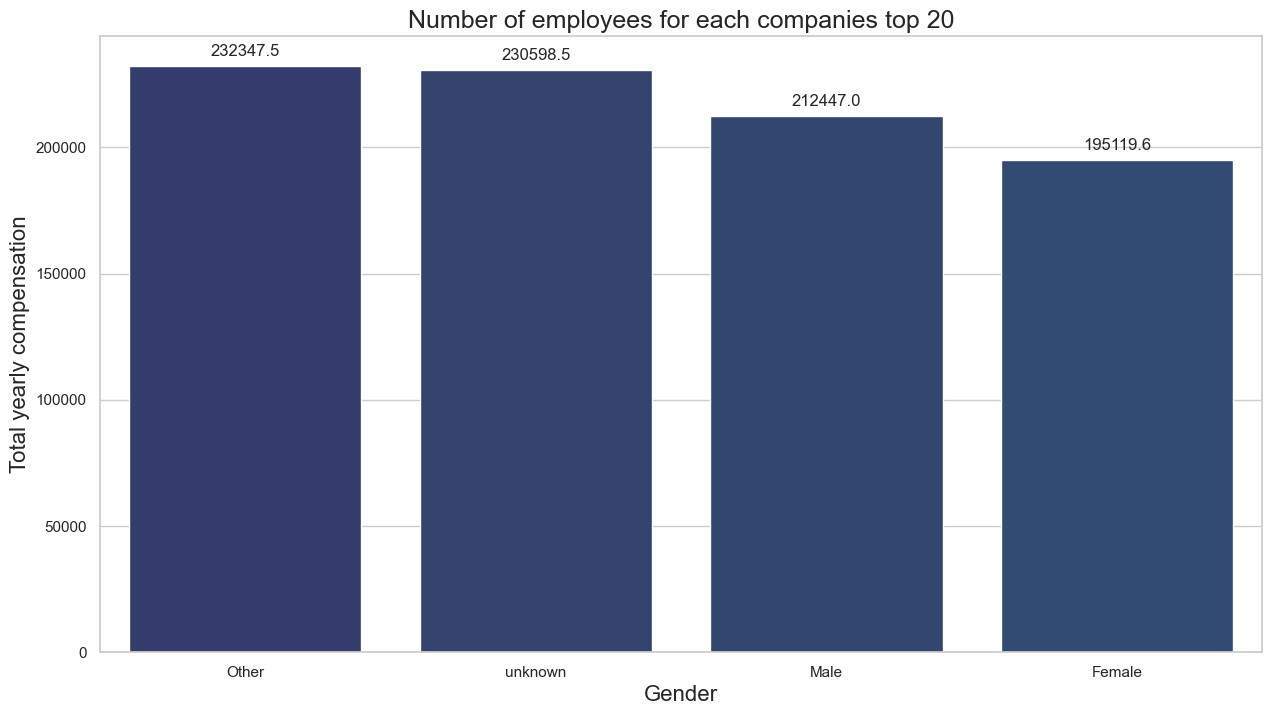

In [69]:
avg_earning_per_gender = df.groupby('gender', as_index=False)['totalyearlycompensation'].mean().sort_values('totalyearlycompensation', ascending=False)

plt.figure(figsize=(15, 8))
splot = sns.barplot(x=avg_earning_per_gender['gender'], y=avg_earning_per_gender['totalyearlycompensation'])
add_value_labels(splot)
plt.xlabel('Gender',fontsize=16)
plt.ylabel('Total yearly compensation', fontsize=16)
plt.title('Number of employees for each companies top 20', fontsize=18)

plt.show()

**males on average had higher salaries than females but that is because there are more males than females.
If there were as many females as males, I think the average annual salaries of females would be higher.**

**note: there were 19,541 workers who did not indicate their gender or had indicated their gender as "unknown".**

# Title of jobs

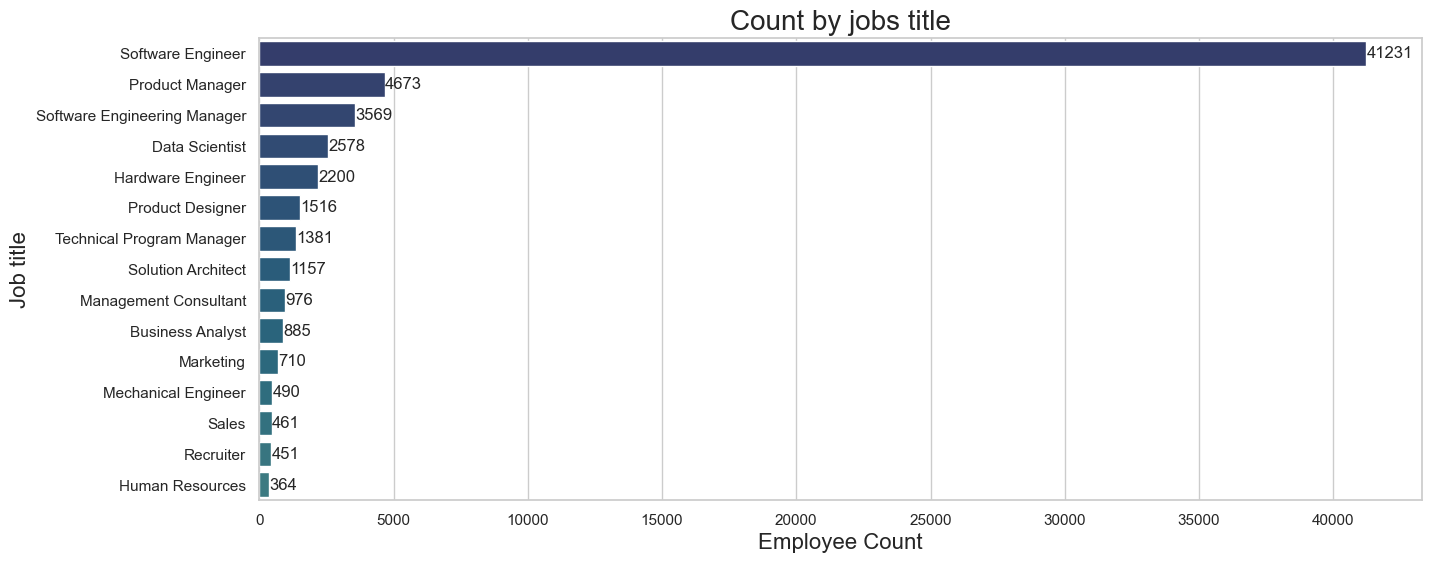

In [78]:
plt.figure(figsize=(15,6))
splot = sns.barplot(x=df['title'].value_counts().values, y=df['title'].value_counts().keys())
splot.bar_label(splot.containers[0])

plt.xlabel('Employee Count', fontsize=16)
plt.ylabel('Job title',fontsize=16)
plt.title('Count by jobs title', fontsize=20)

plt.show()

**software engineer job has highest number of employee, followed by Product Manager and Software Engineering Manager.**


## Top 5 Jobs by gender

In [111]:
gender_per_job=df.groupby(['title', 'gender'], as_index=False).size().sort_values('size', ascending=False)

selected_titles = ['Software Engineer', 'Product Manager', 'Software Engineering Manager',
                   'Data Scientist', 'Hardware Engineer']
gender_per_job = gender_per_job[gender_per_job['title'].isin(selected_titles)]

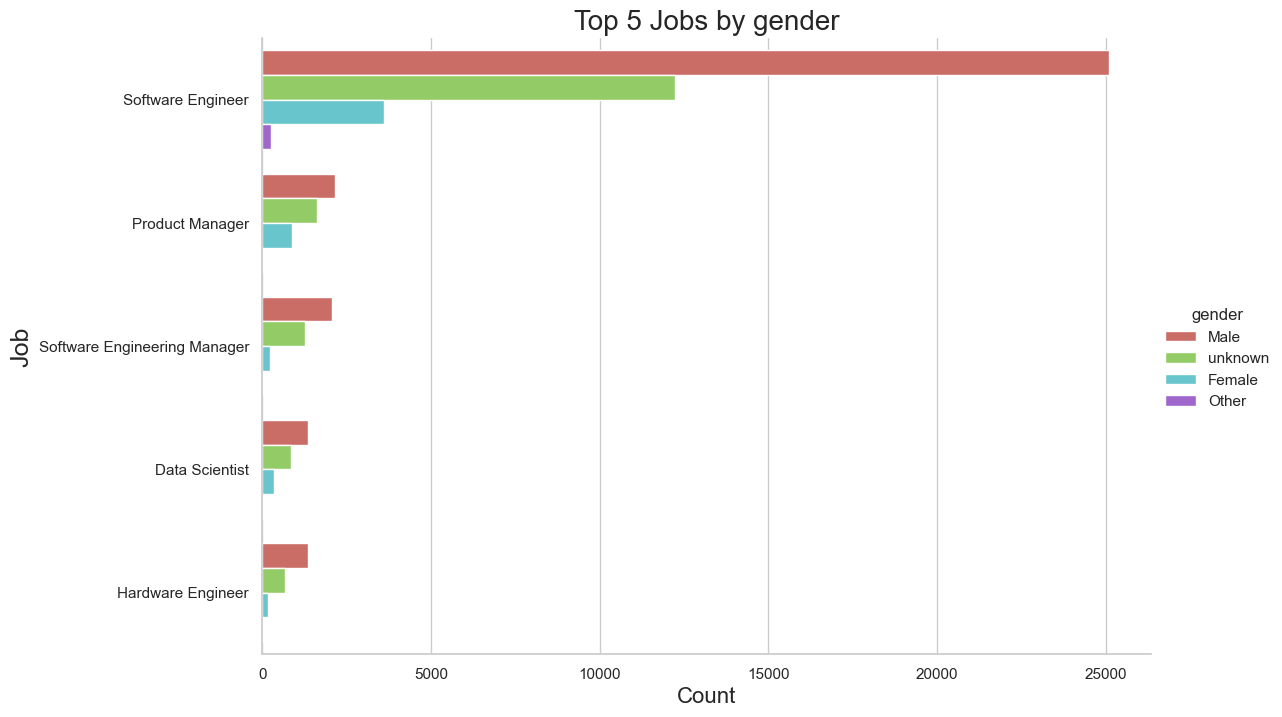

In [112]:
sns.catplot(x='size', y='title', hue='gender', data=gender_per_job,
            kind='bar', height=7, aspect=1.7,  palette="hls")

plt.xlabel('Count', fontsize=16)
plt.ylabel('Job', fontsize=18)
plt.title('Top 5 Jobs by gender', fontsize=20)

plt.show()

**Men who work as software engineer are almost twice as many females.**


## Avg earning per each job

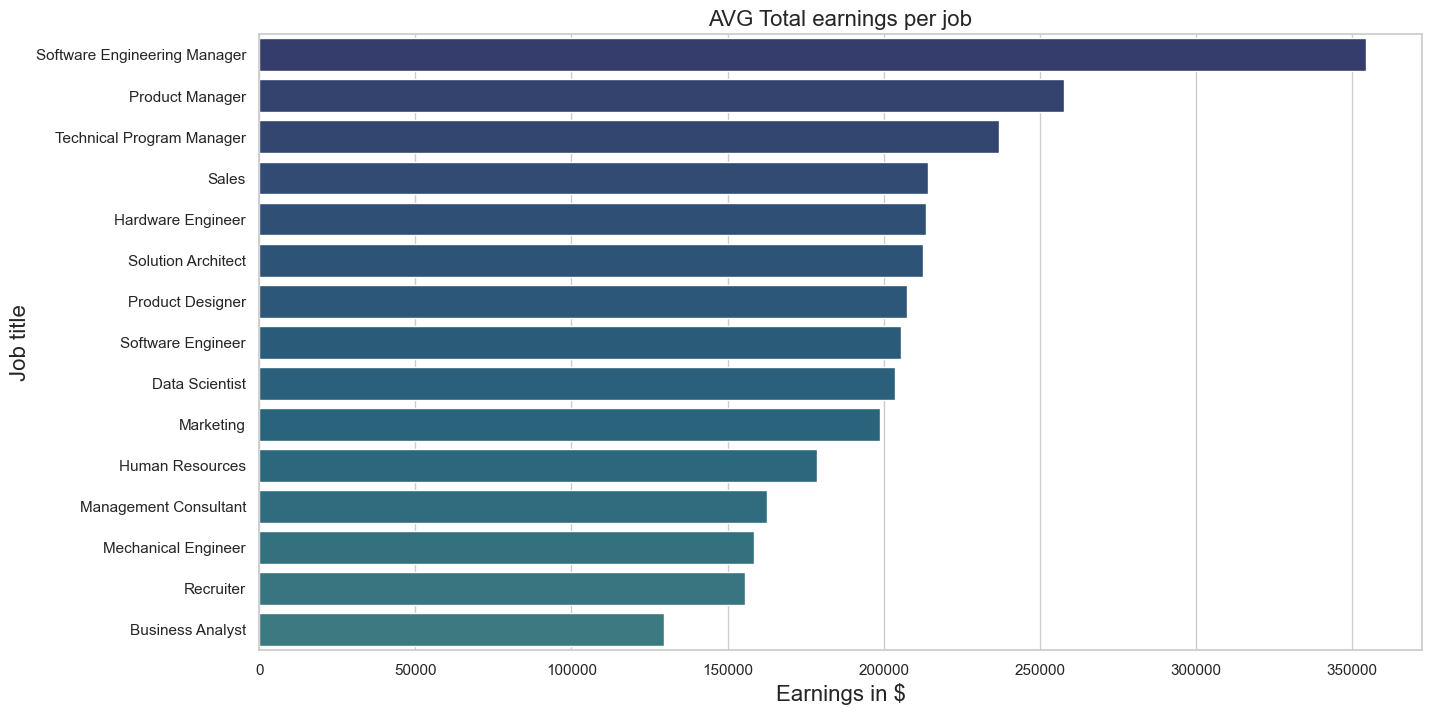

In [121]:
total_income_per_job = df.groupby('title', as_index=False)['totalyearlycompensation'].mean().sort_values(by='totalyearlycompensation', ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(x=total_income_per_job['totalyearlycompensation'], y=total_income_per_job['title'])

plt.title('AVG Total earnings per job',fontsize=16)
plt.xlabel('Earnings in $',fontsize=16)
plt.ylabel('Job title',fontsize=16)
#plt.yticks(fontsize=13)

plt.show()

**we can see that Software Engineering Managers have the average highest compensation because they supervise a lot of Software Engineers.**

**Software Engineering Managers have the average highest compensation, followed by product maneger and technical program maneger.**

## Maximun job title count by company

In [125]:
job_company_count = df.groupby(['title','company'], as_index=False).size()
job_per_company_distribution = job_company_count.groupby('title', as_index=False).apply(lambda x: x.iloc[x['size'].argmax()]).sort_values(by='size', ascending=False)
job_per_company_distribution

,title,company,size
11,Software Engineer,Amazon,4978
8,Product Manager,Amazon,886
12,Software Engineering Manager,Amazon,682
2,Hardware Engineer,Apple,413
13,Solution Architect,Amazon,332
14,Technical Program Manager,Amazon,262
1,Data Scientist,Amazon,257
4,Management Consultant,Deloitte,212
7,Product Designer,Amazon,153
0,Business Analyst,Amazon,121


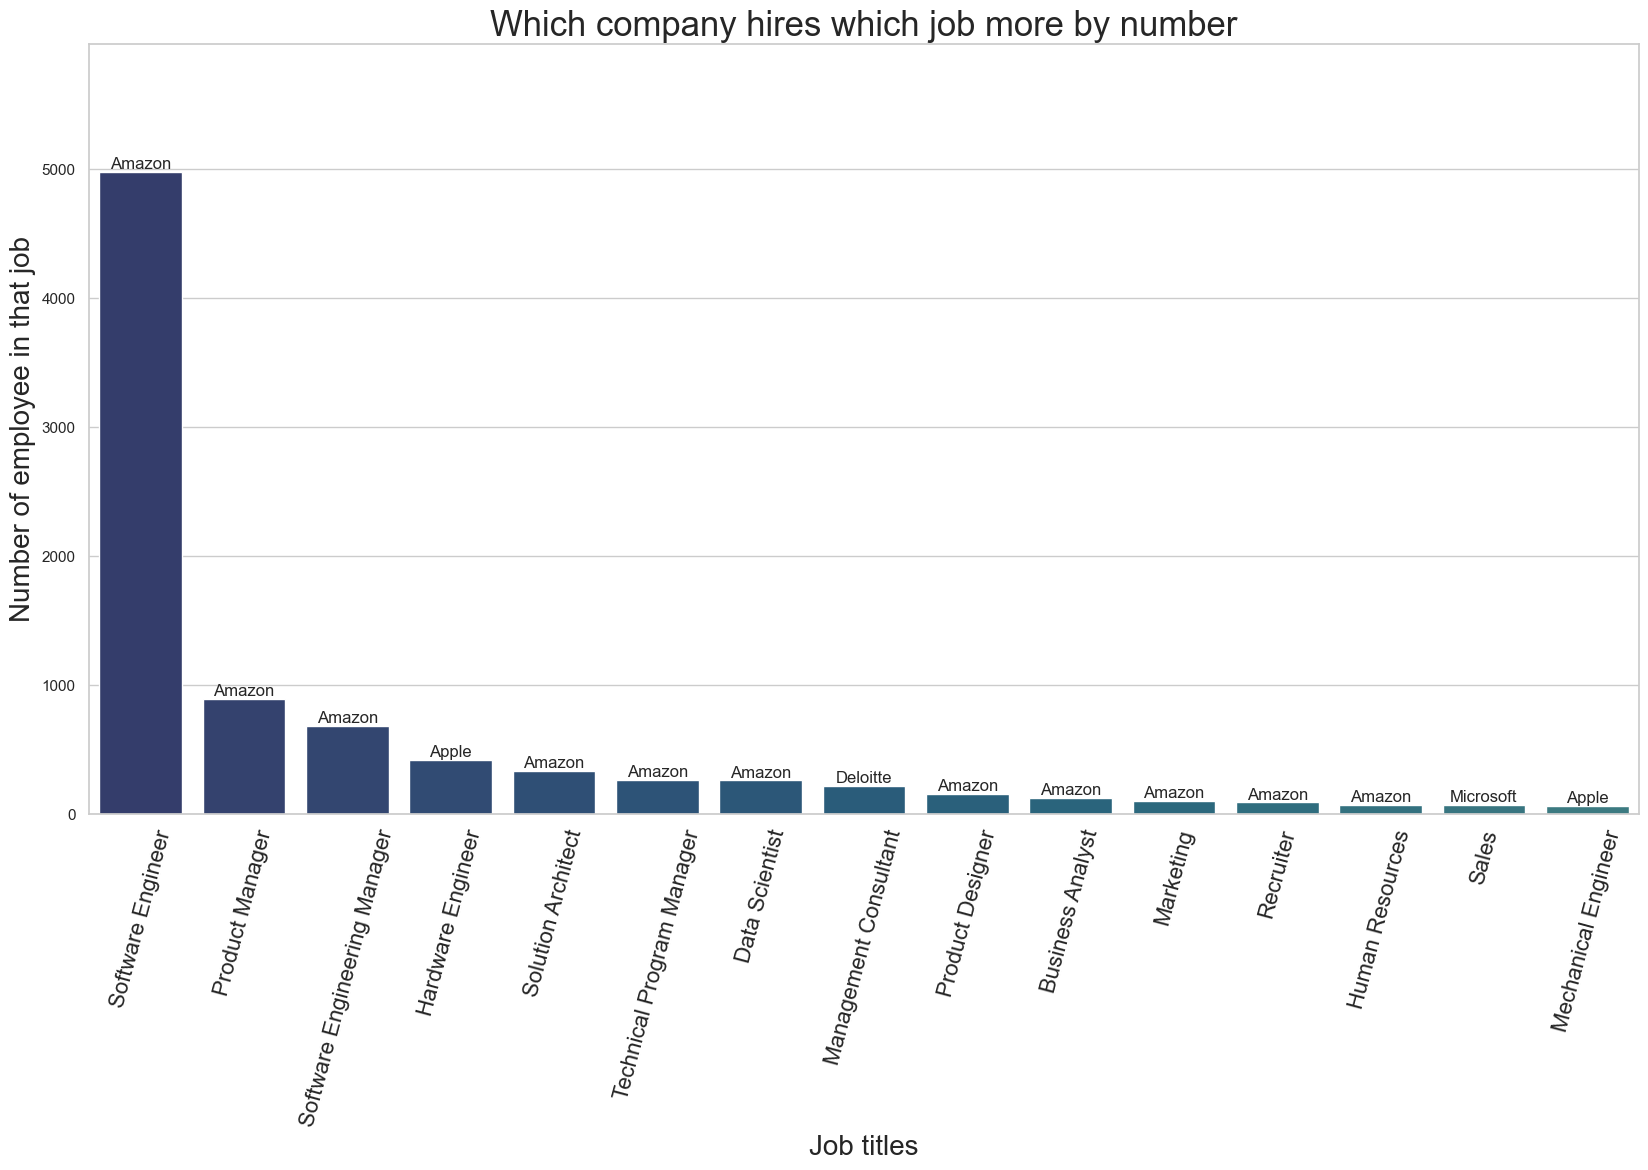

In [130]:
plt.figure(figsize=(20,10))
splot = sns.barplot(x=job_per_company_distribution['title'], y=job_per_company_distribution['size'])

plt.xlabel('Job titles', fontsize=20)
plt.ylabel('Number of employee in that job', fontsize=20)
plt.title('Which company hires which job more by number', fontsize=25)
plt.xticks(rotation=75,fontsize=16)
plt.margins(y=0.2)

# Annotate the bar plot
labels = job_per_company_distribution['company'].values
for rect, label in zip(splot.patches, labels):
    height = rect.get_height()
    splot.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom")


**Software Engineer have a great opportunity to work in Amazon, then comes product maneger and software engineer maneger**

**Apple employs hardware engineer as the most job to work**

## Maximun job count by country

In [132]:
city_job = df.groupby(['title', 'area'], as_index=False).size().sort_values('size', ascending=False)
job_distribution_in_city = city_job.groupby('title', as_index=False).apply(lambda x: x.iloc[x['size'].argmax()]).sort_values(by='size', ascending=False)
job_distribution_in_city

,title,area,size
11,Software Engineer,Seattle,5600
8,Product Manager,Seattle,1043
12,Software Engineering Manager,Seattle,686
1,Data Scientist,San Francisco,373
2,Hardware Engineer,Cupertino,321
7,Product Designer,San Francisco,295
14,Technical Program Manager,Seattle,282
4,Management Consultant,New York,167
5,Marketing,San Francisco,141
0,Business Analyst,San Francisco,105


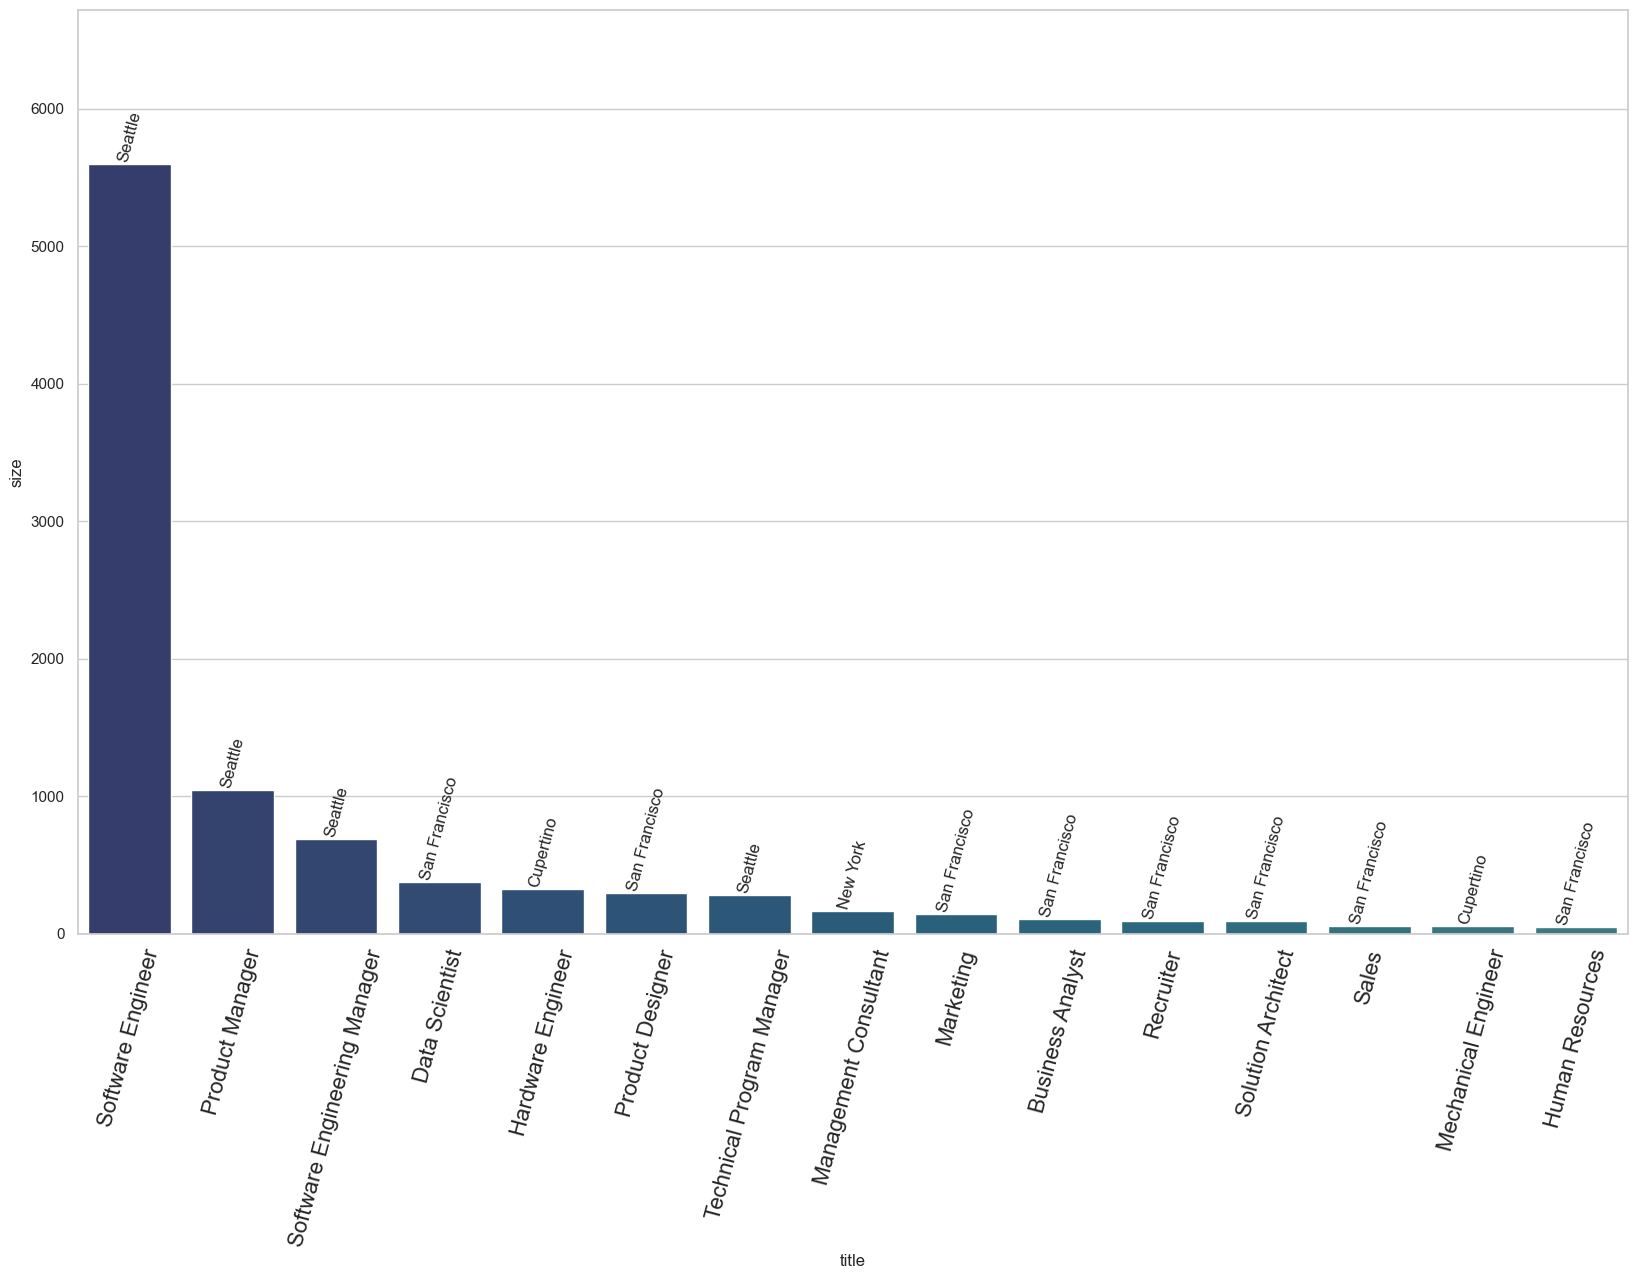

In [133]:
plt.figure(figsize=(20, 12))
splot = sns.barplot(x=job_distribution_in_city['title'], y=job_distribution_in_city['size'])
plt.xticks(rotation=75, fontsize=16)
plt.margins(y=0.2)

labels = job_distribution_in_city['area'].values
for rect, label in zip(splot.patches, labels):
    height = rect.get_height()
    splot.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", rotation=75)


plt.show()

**Seattle Country has a highest number of employees who warhed as Software engineer , Product engineer and Software engineer maneger.**

## Distribution of job by education

In [135]:
education_per_job=df.groupby(['title', 'Education'], as_index=False).size().sort_values('size', ascending=False)

selected_titles = ['Software Engineer', 'Product Manager', 'Software Engineering Manager',
                   'Data Scientist', 'Hardware Engineer']
education_per_job = education_per_job[education_per_job['title'].isin(selected_titles)]

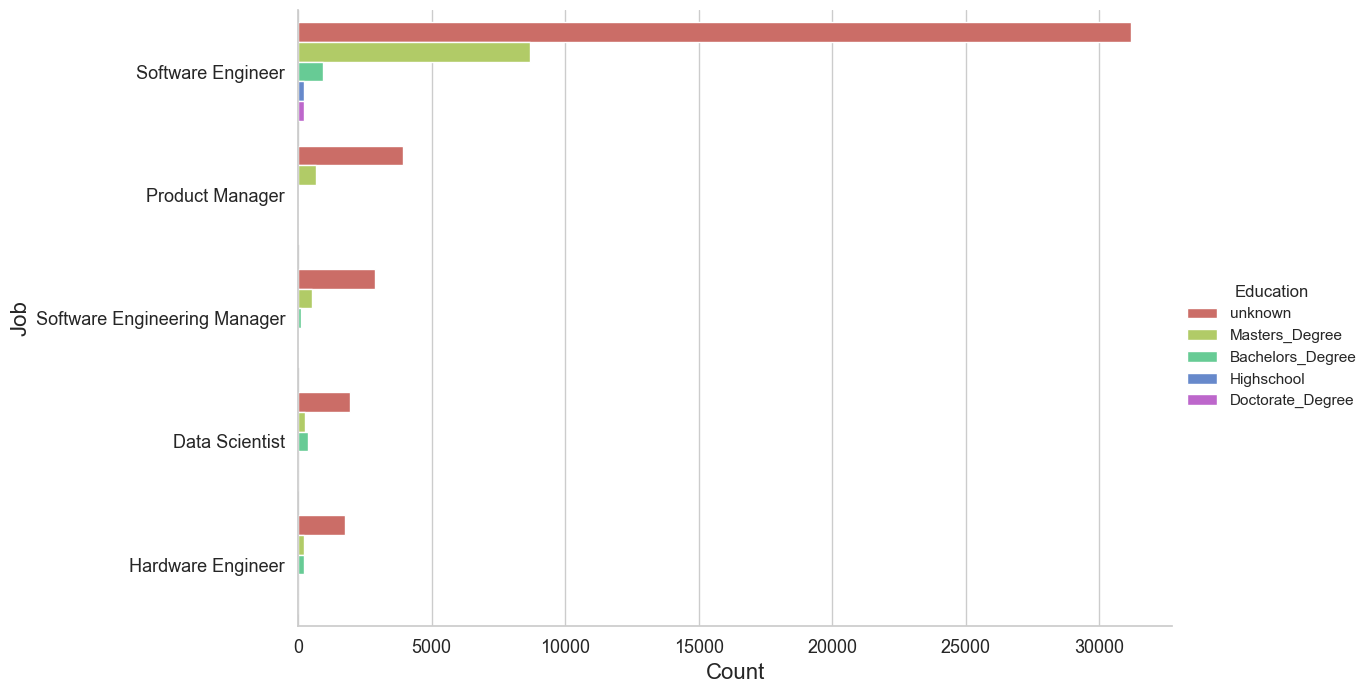

In [138]:
sns.catplot(x='size',y='title',hue='Education',data=education_per_job,
            kind='bar', height=7, aspect=1.7,
            palette='hls')

plt.xlabel('Count', fontsize=16)
plt.ylabel('Job', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

## Area with highest teck employees popultion


In [141]:
employees_per_cities = df.groupby('area', as_index=False).size().sort_values(by='size', ascending=False)

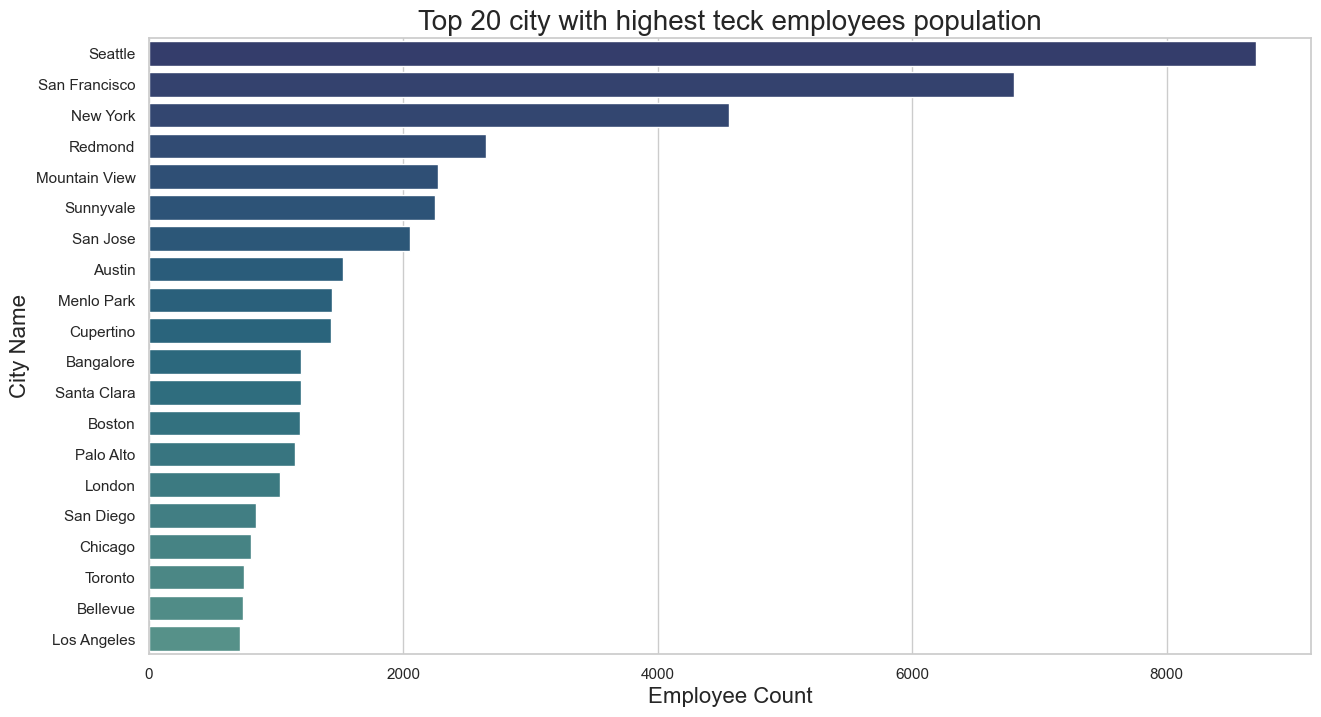

In [140]:
plt.figure(figsize=(15,8))
sns.barplot(x=employees_per_cities.iloc[0:20, 1], y=employees_per_cities.iloc[0:20, 0])
plt.title('Top 20 city with highest teck employees population',fontsize=20)
plt.xlabel('Employee Count', fontsize=16)
plt.ylabel('City Name', fontsize=16)
plt.show()

**No surprise here. Seattle, WA has more tech workers than any other city. This is because Amazon, which is headquartered in the area, has the largest number of workers.**

**After Seattle , comes san francisco and new york.**

## Each companies most paid job title

In [149]:
highest_paying_companies= df[['company', 'title', 'totalyearlycompensation']].groupby('company',as_index=False).max()\
                                                               .nlargest(10, 'totalyearlycompensation')\
                                                               .sort_values('totalyearlycompensation', ascending= False)


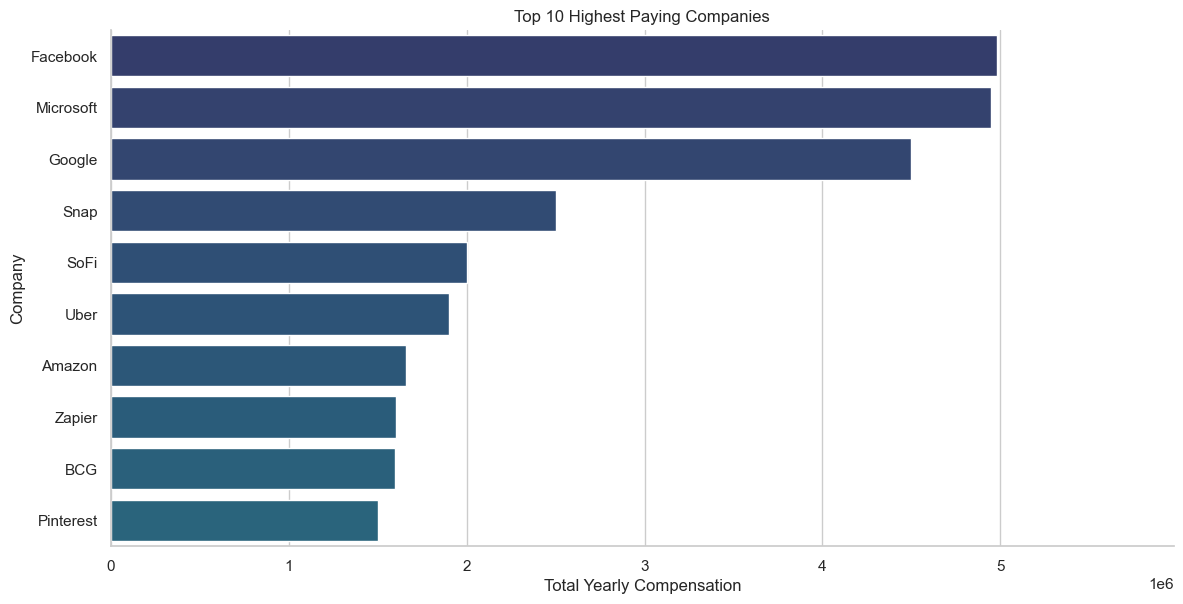

In [156]:
splot= sns.catplot(x='totalyearlycompensation', y='company', data=highest_paying_companies,
            kind='bar', height=6, aspect=2)

plt.margins(x=0.2)
plt.xlabel('Total Yearly Compensation')
plt.ylabel('Company')
plt.title('Top 10 Highest Paying Companies')
plt.show()

**Even though Amazon had the highest number of tech workers, Facebook paid the highest annual salary (almost 5Million dolar), followed by Microsoft and Google.**


# Thank you for reading my notebook, hope it helps... If you liked it, please upvote🆙🙌